In [1]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import statsmodels.api as sm
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

## Description:

Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.


## Data:

The `Sberbank Russian Housing Market dataset` has recently been released by Sber Bank, the oldest and the largest Russia's bank (https://www.kaggle.com/c/sberbank-russian-housing-market/data). The datasets was released for kagglers to propose some models to forecast the house prices. The train dataset contains more than 30000 transactions from August 2011 to June 2015 in the Russian House Market for some years, and the macro dataset provides the daily economic parameters in Russia. A test data also published to evaluate the kagglers' models. As the real prices in the test file is hidden by comptition holders, therefor for the purpose of this capstone project, only the train and macro data is used.

The train data contains 30471 rows with 391 columns for each data point, which has been collected from August 2011 to June 2015. The dataset has been riched with different types of features such as house characteristics, demographics, cultural information, country economical information, etc. The macro data includes 100 economical parameters in Russia for 2484 successive days.

## Data Wranggling:

The dataset is a real big data with hundreds of columns and thousands of rows. First of all it's very beneficial to classify all the fitures to better understand about the data and the relations between different columns. I devided the columns of the train data into 13 classes and inserted the related features in each one.

The bigger data provides the more information helps learning better predictive models, on the other hand, the more concerns arise. Here we go through the data finding missing values and seeking outlier and logically wrong values such as bad relationships within each feature and between different features. For each of these cases there would be different strategies to deal with.

### Read the datasets

In [7]:
train = pd.read_csv('./data/Sber Bank/train.csv')
macro = pd.read_csv('./data/Sber Bank/macro.csv')
train = pd.merge(train, macro, on='timestamp')

print 'train data shape: {}'.format(train.shape)
print 'macro data shape: {}'.format(macro.shape)

train data shape: (30471, 391)
macro data shape: (2484, 100)


### Feature classes:

In [70]:
col_house_char = ['full_sq', 'life_sq', 'kitch_sq', 'num_room', 'floor', 'max_floor', 'material', 'build_year', 'state', 'price_doc']

col_demographic = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female',
                   'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male',
                   '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
                   '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',]

col_school = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school',
              'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion',
              'university_top_20_raion', 'additional_education_raion', 
              'additional_education_km', 'preschool_km', 'school_km']

col_culture = ['big_church_km', 'church_synagogue_km', 'big_church_count_500', 
               'big_church_count_1000', 'church_count_1000', 'big_church_count_1500', 'church_count_1500',
               'big_church_count_2000', 'church_count_2000', 'big_church_count_3000', 'church_count_3000',
               'big_church_count_5000', 'church_count_5000', 
               'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000',
               'church_count_300','church_count_5000',
               'mosque_km', 'mosque_count_1000', 'mosque_count_1500', 'mosque_count_2000',
               'mosque_count_3000', 'mosque_count_5000',]

col_shopping = ['shopping_centers_km', 'shopping_centers_raion', 
                'big_market_raion', 'big_market_km', 'market_shop_km', 'market_count_1000', 'market_count_1500',
                'market_count_2000', 'market_count_3000', 'market_count_5000',]

col_leisure = ['sport_count_500', 'sport_count_1000', 'sport_count_1500', 'sport_count_2000', 
               'sport_count_3000', 'sport_count_5000', 'sport_objects_raion', 
               'leisure_count_500', 'leisure_count_1000', 'leisure_count_1500', 'leisure_count_2000', 
               'leisure_count_3000', 'leisure_count_5000',
               'fitness_km', 'swim_pool_km', 'stadium_km', 'museum_km',
               'park_km', 'ice_rink_km', 'basketball_km', 'theater_km', 'exhibition_km', 'catering_km']

col_office = ['office_km', 'office_count_500', 'office_count_1000','office_count_1500','office_count_2000',
              'office_count_3000','office_count_5000',
              'office_sqm_500', 'office_sqm_1000', 'office_sqm_1500', 'office_sqm_2000',
              'office_sqm_3000', 'office_sqm_5000']

col_infrstructure = ['nuclear_reactor_km', 'nuclear_reactor_rion',
                     'thermal_power_plant_km', 'thermal_power_plant_raion',
                     'power_transmission_line_km',
                     'indust_part', 'industrial_km', 
                     'incineration_km', 'incineration_raion',
                     'water_treatment_km', 'water_km', 'water_1line', 
                     'mkad_km', 'ttk_km', 'sadovoe_km']

col_politic = ['kremlin_km']

col_transport = ['railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk',
                 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto',
                 'railroad_terminal_raion', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
                 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
                 'public_transport_station_km', 'public_transport_station_min_walk',
                 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']

col_health = ['hospice_morgue_km', 'hospital_beds_raion', 'healthcare_centers_raion', 'public_healthcare_km']

col_ecology = ['ecology', 'green_zone_km', 'green_part_500', 'green_part_500', 'green_part_1500']
         
col_trc = ['trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000',
           'trc_sqm_500', 'trc_sqm_1000', 'trc_sqm_1500', 'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_5000']

### Number of missing data

The figure shows the missing value proportions in each column. It could be seen that two features of dataset contains more than 80% missing values and 10 columns includes more than 40%. Overall, there is 93 columns with at least one missing value.

Number of columns contain missing value: 93


[<matplotlib.text.Text at 0x1152cc18>, <matplotlib.text.Text at 0x121c8dd8>]

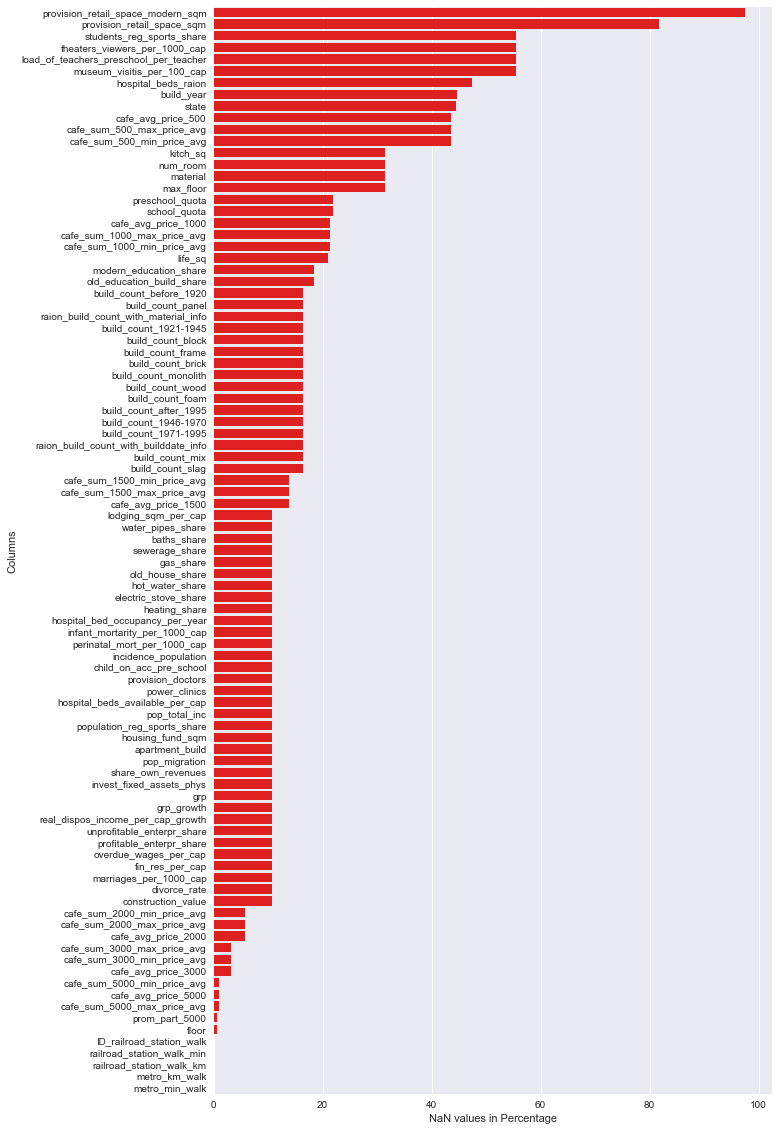

In [9]:
f, ax = plt.subplots(figsize=(10, 20))

df_nan = pd.DataFrame(train.isnull().sum()/len(train)*100).reset_index()
df_nan = df_nan.rename(columns={'index':'cols', 0:'nan_counts'})
df_nan = df_nan[df_nan.nan_counts !=0]
df_nan = df_nan.sort_values(ascending=False, by='nan_counts')

print 'Number of columns contain missing value: {}'.format(len(df_nan))

sns.barplot(y='cols', x='nan_counts', data=df_nan, color='red')
ax.set(xlabel='NaN values in Percentage', ylabel='Columns')

## House characteristic features:

The House charactersitcs might be considere as the most important factor to determine the house price in region. The dataset include different related features:

- **`full_sq`**: total area in square meters, including loggias, balconies and other non-residential areas

- **`life_sq`**: living area in square meters, excluding loggias, balconies and other non-residential areas

- **`floor`**: for apartments, floor of the building

- **`max_floor`**: number of floors in the building

- **`material`**: wall material

- **`build_year`**: year built

- **`num_room`**: number of living rooms

- **`kitch_sq`**: kitchen area

- **`state`**: apartment condition

- **`product_type`**: owner-occupier purchase or investment

- **`sub_area`**: name of the district

The Investigation must be done on features separately and relatively to see some difficulties in the data, missing values, outliers and wrong relations.

### full_sq:

Some odd things could be seen in the **`full_sq`** column:

- There is 2 houses with 0 tota area.

- There is 26 houses with less than 2.5 square meters total area.

- There is only 1 house with more than 1000 square meters total area.

In [22]:
train.full_sq.describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [53]:
print 'Number of 0-valued full_sq:       {}'.format(len(train[train.full_sq==0]))
print 'Number of less than 20 full_sq:   {}'.format(len(train[train.full_sq<20]))
print 'Number of less than 10 full_sq:   {}'.format(len(train[train.full_sq<10]))
print 'Number of less than 5 full_sq:    {}'.format(len(train[train.full_sq<5]))
print 'Number of less than 2.5 full_sq:  {}'.format(len(train[train.full_sq<2.5]))

print 'Number of full_sq=5326:           {}'.format(len(train[train.full_sq==5326]))
print 'Number of more than 500 full_sq:  {}'.format(len(train[train.full_sq>500]))
print 'Number of more than 1000 full_sq: {}'.format(len(train[train.full_sq>1000]))
print 'Number of more than 2000 full_sq: {}'.format(len(train[train.full_sq>2000]))
print 'Number of more than 5000 full_sq: {}'.format(len(train[train.full_sq>5000]))

Number of 0-valued full_sq:       2
Number of less than 20 full_sq:   143
Number of less than 10 full_sq:   29
Number of less than 5 full_sq:    26
Number of less than 2.5 full_sq:  26
Number of full_sq=5326:           1
Number of more than 500 full_sq:  6
Number of more than 1000 full_sq: 1
Number of more than 2000 full_sq: 1
Number of more than 5000 full_sq: 1


In [80]:
train[col_house_char][(train.full_sq==0) + (train.full_sq>500)].sort_values(by='full_sq')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
17932,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4425000
24296,0,77.0,0.0,3.0,4.0,17.0,1.0,0.0,1.0,8167508
23715,603,NaN,1.0,2.0,16.0,18.0,1.0,NaN,NaN,6572700
5944,634,38.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,10200000
18341,634,NaN,0.0,2.0,3.0,17.0,1.0,NaN,NaN,6213200
22785,637,637.0,10.0,2.0,18.0,19.0,4.0,2016.0,1.0,4725142
2780,729,44.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,13250000
3527,5326,22.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,6868818


### full_sq vs. price_doc

From the plot we can see a data point with more than 5000 square meters at very low price. That could be considered as an outlier.

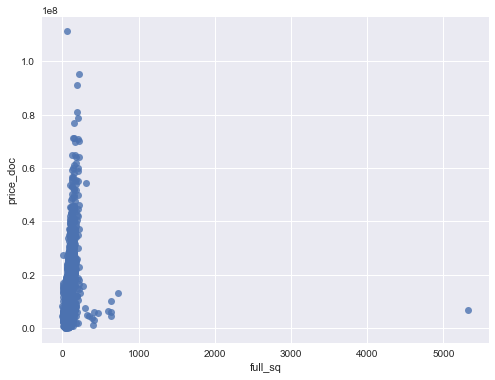

In [67]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.full_sq, train.price_doc, fit_reg=False)

### life_sq:

Some odd things could be seen in the **`life_sq`** column:

- There is 45 houses with 0 total life area.

- The maximum life area is 7478 square meters while the maximum total area was 5326.

- There is 435 houses with less than 2.5 square meters total life area.

- There is only 1 house with more than 1000 square meters and 3 houses with more than 500 square meters total life area.

In [47]:
train.life_sq.describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [65]:
print 'Number of 0-valued life_sq:       {}'.format(len(train[train.life_sq==0]))
print 'Number of less than 10 life_sq:   {}'.format(len(train[train.life_sq<10]))
print 'Number of less than 5 life_sq:    {}'.format(len(train[train.life_sq<5]))
print 'Number of less than 2.5 life_sq:  {}'.format(len(train[train.life_sq<2.5]))

print 'Number of life_sq=7478:           {}'.format(len(train[train.life_sq==7478]))
print 'Number of more than 500 life_sq:  {}'.format(len(train[train.life_sq>500]))
print 'Number of more than 1000 life_sq: {}'.format(len(train[train.life_sq>1000]))
print 'Number of more than 2000 life_sq: {}'.format(len(train[train.life_sq>2000]))
print 'Number of more than 5000 life_sq: {}'.format(len(train[train.life_sq>5000]))

Number of 0-valued life_sq:       45
Number of less than 10 life_sq:   458
Number of less than 5 life_sq:    435
Number of less than 2.5 life_sq:  435
Number of life_sq=7478:           1
Number of more than 500 life_sq:  3
Number of more than 1000 life_sq: 1
Number of more than 2000 life_sq: 1
Number of more than 5000 life_sq: 1


In [79]:
train[col_house_char][(train.life_sq==0) + (train.life_sq>500)].sort_values(by='life_sq')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
858,78,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,552312
21332,73,0.0,1.0,2.0,3.0,16.0,4.0,NaN,1.0,6640370
21445,37,0.0,0.0,1.0,9.0,0.0,6.0,2016.0,1.0,3166838
21453,48,0.0,0.0,1.0,7.0,9.0,1.0,0.0,1.0,3411777
21638,84,0.0,1.0,3.0,8.0,0.0,1.0,0.0,1.0,9377280
21677,42,0.0,1.0,1.0,15.0,24.0,1.0,0.0,1.0,5591751
21708,56,0.0,0.0,2.0,13.0,19.0,1.0,0.0,1.0,4278104
21809,37,0.0,0.0,1.0,18.0,19.0,1.0,2016.0,3.0,3116696
22158,63,0.0,0.0,2.0,14.0,17.0,1.0,0.0,1.0,7047839
22552,55,0.0,0.0,2.0,8.0,0.0,1.0,2015.0,1.0,4684993


### life_sq vs. price_doc

From the plot we can see a data point with more than 5000 square meters life area at very low price. That could be considered as an outlier.

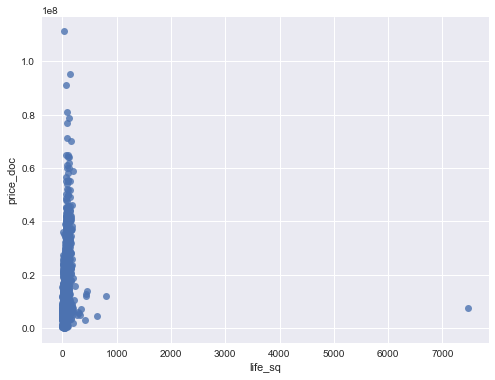

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.life_sq, train.price_doc, fit_reg=False)

### kitch_sq:

Some odd things could be seen in the `kitch_sq` column:

- There is 1381 houses with 0 total life area.

- The maximum kitchen area is 2014 square meters.

- There is 2 houses with more than 2000 square meters and 4 houses with more than 1000 square meters and 5 houses with 500 square meters kitchen area.

- For indices of [10368, 13117, 21415], it seems that the kitch_sq is in fact the build_year. 

- In [11520] the kitch_sq is abnormally large, even much larger than life_sq and full_sq, so it's better to drop this row or alternatively replace the kitch_sq with NaN value.

In [59]:
train.kitch_sq.describe()

count    20899.000000
mean         6.399301
std         28.265979
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: kitch_sq, dtype: float64

In [64]:
print 'Number of 0-valued kitch_sq:       {}'.format(len(train[train.kitch_sq==0]))
print 'Number of kitch_sq=2014:           {}'.format(len(train[train.kitch_sq==2014]))
print 'Number of more than 500 kitch_sq:  {}'.format(len(train[train.kitch_sq>500]))
print 'Number of more than 1000 kitch_sq: {}'.format(len(train[train.kitch_sq>1000]))
print 'Number of more than 2000 kitch_sq: {}'.format(len(train[train.kitch_sq>2000]))

Number of 0-valued kitch_sq:       1381
Number of kitch_sq=2014:           1
Number of more than 500 kitch_sq:  5
Number of more than 1000 kitch_sq: 4
Number of more than 2000 kitch_sq: 2


In [78]:
train[col_house_char][(train.kitch_sq>500)]

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
10368,79,41.0,2013.0,3.0,5.0,17.0,6.0,2013.0,1.0,7281225
11520,38,23.0,620.0,2.0,11.0,14.0,5.0,1971.0,2.0,6300000
13117,31,19.0,1970.0,1.0,5.0,1.0,1.0,NaN,3.0,3650000
21415,43,43.0,2014.0,1.0,3.0,1.0,1.0,2014.0,1.0,3801200
28734,31,16.0,1974.0,1.0,2.0,12.0,5.0,1972.0,3.0,1000000


### kitch_sq vs. price_doc

From the plot we can see a data point with more than 500 square meters and 4 data points with around 2000 square meters at very low prices. That could be considered as an outlier.

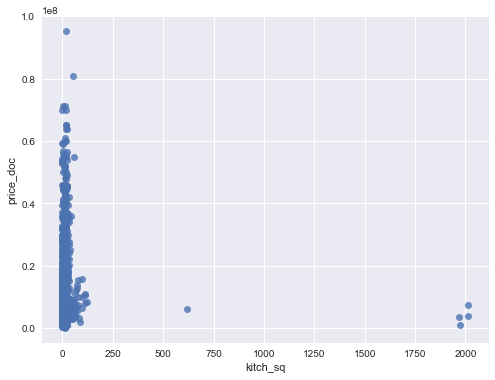

In [97]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.kitch_sq, train.price_doc, fit_reg=False)

### Relations between full_sq, life_sq and kitch_sq:

There are some simple relationships between these variables anticipated in the dataset:

- `full_sq` > `life_sq`
- `full_sq` > `kitch_sq`
- `life_sq` > `kitch_sq` (for isolated houses)

However it could be seen:

- There are 37 data with `life_sq` > `full_sq`

- There are 12 data with `kitch_sq` > `full_sq`

- There are 56 data with `kitch_sq` > `life_sq`

There is a possibility that in theses cases the employees had displaced these values. for example, one might be written the house life_sq in the full_sq column.

In [138]:
print 'Number of train data with full_sq  < life_sq:   %d' % (train.life_sq > train.full_sq).sum()
print 'Number of train data with full_sq  < kitch_sq:  %d' % (train.kitch_sq > train.full_sq).sum()
print 'Number of train data with kitch_sq < life_sq:   %d' % (train.kitch_sq > train.life_sq).sum()

Number of train data with full_sq  < life_sq:   37
Number of train data with full_sq  < kitch_sq:  12
Number of train data with kitch_sq < life_sq:   56


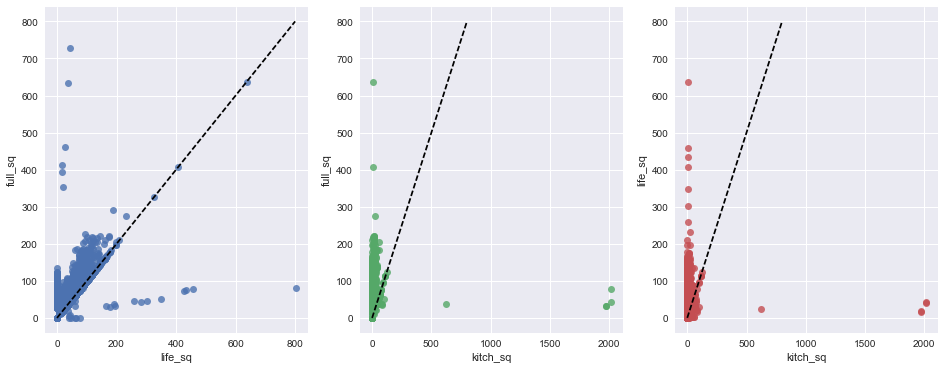

In [148]:
index = (train.life_sq<5000) & (train.full_sq<5000)

f, ax = plt.subplots(1,3,figsize=(16, 6))
sns.regplot(train.ix[index, 'life_sq'], train.ix[index, 'full_sq'], fit_reg=False, ax=ax[0])
ax[0].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

sns.regplot(train.ix[index, 'kitch_sq'], train.ix[index, 'full_sq'], fit_reg=False, ax=ax[1])
ax[1].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

sns.regplot(train.ix[index, 'kitch_sq'], train.ix[index, 'life_sq'], fit_reg=False, ax=ax[2])
ax[2].plot(np.linspace(0,800,100), np.linspace(0,800,100), '--', color='black')

### num_room:

- There is 9 houses with more than 7 rooms and 18 houses with more than 6 rooms.

- For houses with more than 6 rooms, mostly the `full_sq`s are very small in comparison with number of rooms. At least we can put a seriouse suspicious for those values which have full_sq<100.



In [70]:
train.num_room.value_counts().sort_index()

0.0       14
1.0     7602
2.0     8132
3.0     4675
4.0      418
5.0       40
6.0        9
7.0        1
8.0        3
9.0        1
10.0       2
17.0       1
19.0       1
Name: num_room, dtype: int64

In [83]:
print 'Number of house with more than 7 rooms: {}'.format(len(train[train.num_room>6]))

Number of house with more than 7 rooms: 9


In [84]:
bad_index = train.num_room >= 6
train[col_house_char].ix[bad_index].sort_values(by='num_room')

,full_sq,life_sq,kitch_sq,num_room,floor,max_floor,material,build_year,state,price_doc
10076,106,NaN,0.0,6.0,2.0,2.0,1.0,2014.0,1.0,4980000
28622,129,83.0,11.0,6.0,2.0,7.0,2.0,1910.0,2.0,29700000
28081,219,101.0,16.0,6.0,2.0,2.0,4.0,2014.0,1.0,18000000
24007,92,68.0,7.0,6.0,4.0,6.0,2.0,1929.0,3.0,15400000
19390,57,37.0,6.0,6.0,7.0,9.0,1.0,1969.0,2.0,8000000
15145,215,134.0,7.0,6.0,10.0,10.0,2.0,2003.0,1.0,23000000
13242,170,123.0,14.0,6.0,4.0,4.0,2.0,NaN,NaN,34800000
16743,303,NaN,0.0,6.0,32.0,32.0,1.0,NaN,NaN,54212936
29656,211,162.0,19.0,6.0,5.0,5.0,2.0,1914.0,3.0,70000000
18990,145,109.0,9.0,7.0,5.0,6.0,2.0,1936.0,3.0,25500000


### max_floor vs. floor:

There is another logical relationship between house characteristics that must be held in the dataset:

- `max_floor` > `floor`

Unfortunately there are 1493 data with wrong relation: `max_floor` < `floor`

In [16]:
print 'Number of train data with floor > max_floor:   %d' % (train.floor > train.max_floor).sum()

Number of train data with floor > max_floor:   1493


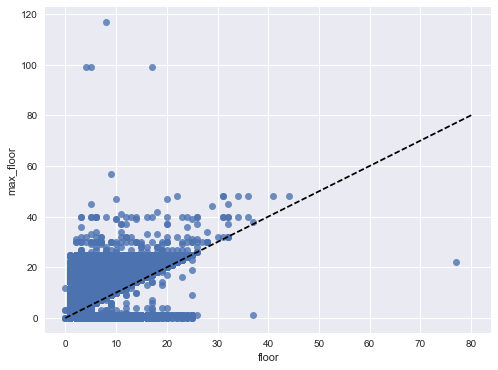

In [150]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.floor, train.max_floor, fit_reg=False)
sns.plt.plot(np.linspace(0,80,100), np.linspace(0,80,100), '--', color='black')

### state:

The state could get integer values of 1-4, therefor the state = 36 is not acceptable. The row of data containing this value either must be dropped out or considered as missing value.

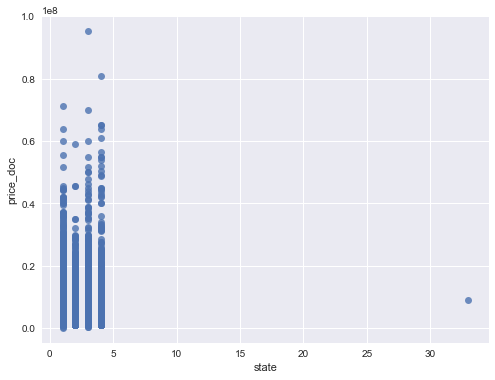

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(train.state, train.price_doc, fit_reg=False)

### build_year:

There is some values of build_year that have big differences to others. Some of them can be dropped out with no concern, however some other must be modified because they include a large proportion of dataset.

- The most important values are the ones with the build_year of 0 and 1, as the dataset includes 898 rows with thses values.  Fortunately there is a reasonable assumption to take these vlues as the house' age instead of its build_year.

- The build_year=20052009 can be considered as a range of 2005-2009 and alternatively replcaed with the mid-range.

- Other values including build_year=[3, 20, 71, 215, 4965] can be dropped out or replaced with NaN.

In [19]:
train.build_year.value_counts().sort_index()

0.0           530
1.0           368
3.0             2
20.0            1
71.0            1
215.0           1
1691.0          1
1860.0          2
1876.0          1
1886.0          1
1890.0          5
1895.0          1
1896.0          2
1900.0          2
1904.0          1
1905.0          1
1906.0          1
1907.0          2
1910.0          5
1911.0          1
1912.0          5
1914.0          3
1915.0          5
1917.0         16
1920.0          1
1924.0          3
1925.0          1
1926.0          8
1927.0         10
1928.0         12
             ... 
1991.0         93
1992.0        139
1993.0        115
1994.0        160
1995.0        149
1996.0        162
1997.0        139
1998.0        141
1999.0        125
2000.0        130
2001.0        177
2002.0        214
2003.0        193
2004.0        220
2005.0        176
2006.0        242
2007.0        219
2008.0        234
2009.0        176
2010.0        132
2011.0        162
2012.0        233
2013.0        464
2014.0        919
2015.0    

## Handling Categorical data

Thereare 19 categorical columns in the dataset. Most of the machine learning algorithms are not compatible with categorical data. There are different ways to deal with this difficulty:

1- Label Encoding: Encode labels with value between 0 and n_classes-1.

2- One-Hot Encoding: Encode categorical integer features using a one-hot aka one-of-K scheme. This estimator transforms each categorical feature with m possible values into m binary features, with only one active.


In [162]:
print 'Number of Categorical features: %d' % len(train.columns[train.dtypes=='object'])

Number of Categorical features: 19


In [27]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))

## Handling Missing data

After all the dataset has a lot of missing values and also we might add more to it. A lot of different strategies are accessible to handle the missing values and outliers:

1- drop-out missing values: When we have a very few outliers or missing values it could be acceptable, but in most of the cases that's a very bad idea.

2- Independant Imputation of columns: We can fill missing values in each column with a function (example; mean, median) of that column independantly. It does very fast but not consider the correlations with other variables.

3- Regression Imputation: We can apply some Regression models such as Linear or knn Regression to estimate the missing values with respect to correlated features. It's more precise but very slow method.

4- Decision Tree based Algorithm: Decision tree has the potential to handle with missing values. The best Machine Learning algorithm to do this is the `Extreme Gradient boosting` which has been recently published. `xgboost` is a package of libraries that implemented this algorithm.

## Feature Engineering

A very effective way to boost up the model perforemance is to use the art of Feature Engineering. That's to some extent heuristic, but it worth considering. Here I extended the `timestamp` column into different variables, such as, `year`, `month`, `quarter`, etc. This is because the hosuse price has a periodic characteristic with respect to month, quarter, year, etc. Therefor, these features could guide the model to better learned.

Another important feature that could be extracted from the dataset is the building age. It's very effective factor to determine the house price. This feature is simply computed with the subtraction of transaction year and build year.

Also It could be useful to add some relative features , such the ratio of **`full_sq`** and **`life_sq`**, **`kitch_sq`** and **`life_sq`**, **`life_sq`** and **`num_room`**.

In [28]:
train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['day'] = train['timestamp'].dt.day
train['quarter'] = train['timestamp'].dt.quarter
train['year_quarter'] = train['timestamp'].dt.to_period('Q')
train['year_month'] = train['timestamp'].dt.to_period('M')

train['age'] = train['timestamp'].dt.year - train['build_year']

train['life_rel'] = train['life_sq']/train['full_sq']
train['kitch_rel'] = train['kitch_sq']/train['life_sq']
train['room_sq'] = train['life_sq']/train['num_room']

### Wranggling:

In [21]:
train.ix[train.life_sq > train.full_sq, 'life_sq'] = np.nan
train.ix[train.kitch_sq > train.full_sq, 'kitch_sq'] = np.nan
train.ix[train.kitch_sq > train.life_sq, 'kitch_sq'] = np.nan

train.ix[train.floor > train.max_floor, 'floor'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
train.ix[train.build_year > 2018, 'build_year'] = np.nan
train.ix[train.build_year < 1600, 'build_year'] = np.nan

In [24]:
train.ix[train.full_sq <= 6, 'full_sq'] = np.nan
train.ix[train.life_sq <= 6, 'life_sq'] = np.nan

train.ix[train.full_sq > 2000, 'full_sq'] = np.nan
train.ix[train.life_sq > 2000, 'life_sq'] = np.nan

bad_index = [13117]
train.ix[bad_index, 'build_year'] = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = [10368, 11520, 13117, 21415, 28734]
train.ix[bad_index, 'kitch_sq'] = np.nan

bad_index = train.ix[(train.num_room>=6) & (train.full_sq<100)].index
train.ix[bad_index, 'num_room'] = np.nan

bad_index = train.kitch_sq > train.life_sq
temp = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = train.ix[bad_index, 'life_sq']
train.ix[bad_index, 'life_sq'] = temp

bad_index = train.kitch_sq > train.full_sq
temp = train.ix[bad_index, 'kitch_sq']
train.ix[bad_index, 'kitch_sq'] = train.ix[bad_index, 'full_sq']
train.ix[bad_index, 'full_sq'] = temp

bad_index = train.life_sq > train.full_sq
temp = train.ix[bad_index, 'life_sq']
train.ix[bad_index, 'life_sq'] = train.ix[bad_index, 'full_sq']
train.ix[bad_index, 'full_sq'] = temp

bad_index = train.floor > train.max_floor
temp = train.ix[bad_index, 'floor']
train.ix[bad_index, 'floor'] = train.ix[bad_index, 'max_floor']
train.ix[bad_index, 'max_floor'] = temp

train.ix[train.state > 30, 'state'] = np.nan

train.timestamp = pd.to_datetime(train.timestamp)
bad_index = (train.build_year == 0)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year
bad_index = (train.build_year == 1)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-1
bad_index = (train.build_year == 3)
train.ix[bad_index, 'build_year'] = train.ix[bad_index].timestamp.dt.year-3
train.ix[train.build_year < 1600, 'build_year'] = np.nan
train.ix[train.build_year > 2018, 'build_year'] = np.nan